<a href="https://colab.research.google.com/github/Scrabby1/ADA-Informes/blob/main/informe_Problema_de_la_mochila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Descripción del problema

**Entrada:** un valor **W** que representa la capacidad máxima de la mochila, un arreglo **val** con el precio de los objetos y otro arreglo con los pesos de los objetos **wt** ambos arreglos del mismo tamaño **n**, este tamaño también será recibido

**Salida:** El mayor costo que se puede acumular respetando la capacidad máxima

Cuando hacemos un algoritmo para encontrar una solución, siempre se quiere encontrar la solución más eficiente de todas, este tipo de problema se llaman problemas de optimización, en este informe se vera la solución para encontrar el mayor precio que se puede almacenar en una mochila respetando su capacidad maxima, esto lo hará el algoritmo del problema de la mochila.

El tamaño del problema va a ser el tamaño de la entrada,en este caso sera el tamaño de los arreglos

#2.Problema de la mochila

**Versión dinámica**

In [1]:
import random

def knapsack_instance_generator(N):
  val = []
  wt = []
  prev_v = 0
  prev_w = 0
  for i in range(N):
    v = random.randint(1, 100)
    val.append(prev_v + v)
    prev_v += v
    
    w = random.randint(1, 10)
    wt.append(prev_w + w)
    if (v >= 50):
        prev_w += w

  W = int(sum(wt) / 2)
  return W, val, wt

W, val, wt = knapsack_instance_generator(10)

In [2]:
subproblemas=0
def mochila(W, wt, val, n,verbose=False):
    K = [[0 for x in range(W + 1)] for x in range(n + 1)]
 
    # construir la matriz K[][] desde abajo hacia arriba
    if(verbose==True):
      print("Se genera la matriz K")
    for i in range(n + 1):
        for w in range(W + 1):
            global subproblemas
            subproblemas+=1
            if i == 0 or w == 0:#caso base,cuando el peso es 0 o el objeto es nulo
                if(verbose==True):
                  print("el objeto entra en el caso base,su peso es 0 o directamente no hay objetos")
                K[i][w] = 0
            elif wt[i-1] <= w:#caso donde el peso puede ser considerado parael valor maximo
                if(verbose==True):
                  print("entra en el caso comun")
                  print("El peso objeto:",wt[i-1]," es <= que la capacidad maxima")
                  print("Se comprueba el valor actual o los casos adyacentes a este")
                  print("valor actual:",val[i-1] + K[i-1][w-wt[i-1]])
                K[i][w] = max(val[i-1]
                          + K[i-1][w-wt[i-1]], 
                              K[i-1][w])
                if(verbose==True):
                  print("Resultado calculado:",K[i][w])
            else:#caso donde el peso rebasa la capacidad maxima actual
                if(verbose==True):
                  print("El peso del objeto actual hace exceder la capacidad maxima,se debe tomar un valor adyascente")
                K[i][w] = K[i-1][w]
                if(verbose==True):
                  print("Resultado calculado:",K[i][w])
            if(verbose==True):
              print("---------------------------------------------------------------------------------------------")

    
    if(verbose==True):
      print("Salida del algoritmo:",K[n][W])
    return K[n][W]
 
 
#Ejemplo
val = [60, 100, 120]
wt = [10, 20, 30]
W = 50
n = len(val)
subproblemas=0
print("Precio maximo que cumple con la capacidad dada:",mochila(W, wt, val, n))
print("cantidad de subproblemas:",subproblemas)

Precio maximo que cumple con la capacidad dada: 220
cantidad de subproblemas: 204


**Versión greedy**

In [3]:
def partition(array,array2, low, high):#funcion encargada de ordenar segun un pivote
    pivot = array[high]
    i = low - 1
    for j in range(low, high):
        if array[j] <= pivot:
            i = i + 1
            (array[i], array[j]) = (array[j], array[i])
            (array2[i], array2[j]) = (array2[j], array2[i])
    (array2[i + 1], array2[high]) = (array2[high], array2[i + 1])
    (array[i + 1], array[high]) = (array[high], array[i + 1])
    return i + 1

def quick_sort(array,array2, low, high):#Funcion encargada de ordenar los arreglos
    if low < high:
        pi = partition(array,array2, low, high)
        quick_sort(array,array2, low, pi - 1)
        quick_sort(array,array2, pi + 1, high)

In [4]:
iteracion=0
def mochilaGreedy(W, wt, val, n,verbose=False):
    ratio=[0 for i in range(n)]#arreglo de proporciones
    idx=[i for i in range(n)]#arreglo de indices
    if(verbose==True):
      print("Se inician ambos arreglos")
      print("Ratio:",ratio)
      print("Idx:",idx)
      print("---------------------------------------------------------------------------------------------")

    if(verbose==True):
      print("Se calculan las proporciones para el arreglo ratio")

    for i in range(n):#Se colocan las proporciones
      ratio[i]=val[i]/wt[i]

    if(verbose==True):
      print("Ratio:",ratio)
      print("---------------------------------------------------------------------------------------------")
      print("Se ordenara el arreglo idx a base de los indices de ratio ordenado")

    quick_sort(ratio,idx, 0, n-1)#se ordenan ambos arreglos
    if(verbose==True):
      print("Ratio:",ratio)
      print("idx:",idx)
      print("---------------------------------------------------------------------------------------------")

    if(verbose==True):
      print("Se comprueba cuales objetos son aptos para la mochila")


    maxValue=0
    for i in idx:#Se calcula el valor maximo
      global iteracion
      iteracion+=1
      if(wt[i]<=W):
        if(verbose==True):
          print("objeto con valor ",val[i], " y con peso ",wt[i])
        maxValue+=val[i]
        if(verbose==True):
          print("valor maximo actual:",maxValue)
        W*=wt[i]
 
    if(verbose==True):
      print("---------------------------------------------------------------------------------------------")
      print("Salida del algoritmo:",maxValue)
    return maxValue
 

val = [60, 100, 120]
wt = [10, 20, 30]
W = 50
n = len(val)
iteracion=0
print("Precio maximo que cumple con la capacidad dada:",mochilaGreedy(W, wt, val, n))
print("Cantidad de iteraciones:",iteracion)

Precio maximo que cumple con la capacidad dada: 280
Cantidad de iteraciones: 3


##2.1.Descripciones de los algoritmos

Los dos algoritmos poseen una subestructura optima la cual es la siguiente

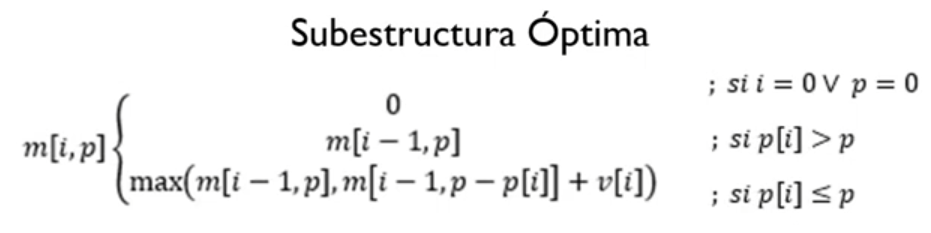

Lo que nos explica esta forma es que depende de la clave actual **i** y peso actual **p**, el primer caso sería para valores nulos, el segundo caso sería cuando el peso actual supera a la capacidad que tenemos en ese momento,entonces se tomara el valor de la casilla anterior, en el tercer caso se va considerar el máximo entre el valor de la casilla anterior y la suma entre el peso previo y el valor del peso actual

Como entrada, ambos algoritmos van a tener el arreglo de precios **val**, el arreglo de pesos **wt**, el tamaño de estos arreglos **n** y la capacidad de la mochila **w**

**Versión dinámica**

Este algoritmo opera dinamicamente a base de la subestructura optima.Primero vamos a crear la matriz **k** con dimensiones de **n+1** y **W+1**,esta va a ir alamcenando los valores maximos de cada subproblema

Se debe ir recorriendo la matriz, en la primera fila y columna se llenara de 0,luego se aplica la lógica de la subestructura optima y de ese modo se ira llenando la matriz

**Versión greedy**

Para esta versión se ejecutan los siguientes pasos:

A base de uno de los dos arreglos, obtener todos los índices de los objetos **idx** 

Se calcula el valor por peso de cada objeto y se guarda en un nuevo arreglo **ratio**

Se ordenan los índices **idx** segun el valor por el peso de manera ascendente **ratio**

Se recorre los índices de **idx** y se van sumando a una variable que guardara el precio máximo

Al final los dos algoritmos van a retornar el precio máximo que respeta la capacidad de la mochila

##2.2.Ejecución del algoritmo dinámico paso a paso (verbose=True)

In [ ]:
W, val, wt = knapsack_instance_generator(3)
print("Arreglo con valores:",val)
print("Arreglo con pesos:",wt)
print("capacidad maxima:",W)
a=mochila(W, wt, val, n,True)

Arreglo con valores: [10, 35, 81]
Arreglo con pesos: [2, 2, 7]
capacidad maxima: 5
Se genera la matriz K
el objeto entra en el caso base,su peso es 0 o directamente no hay objetos
---------------------------------------------------------------------------------------------
el objeto entra en el caso base,su peso es 0 o directamente no hay objetos
---------------------------------------------------------------------------------------------
el objeto entra en el caso base,su peso es 0 o directamente no hay objetos
---------------------------------------------------------------------------------------------
el objeto entra en el caso base,su peso es 0 o directamente no hay objetos
---------------------------------------------------------------------------------------------
el objeto entra en el caso base,su peso es 0 o directamente no hay objetos
---------------------------------------------------------------------------------------------
el objeto entra en el caso base,su peso es 0 o dir

##2.3.Ejecución del algoritmo greedy paso a paso (verbose=True)

In [ ]:
W, val, wt = knapsack_instance_generator(3)
print("Arreglo con valores:",val)
print("Arreglo con pesos:",wt)
print("capacidad maxima:",W)
max=mochilaGreedy(W, wt, val, n,True)

Arreglo con valores: [16, 104, 116]
Arreglo con pesos: [6, 4, 5]
capacidad maxima: 7
Se inician ambos arreglos
Ratio: [0, 0, 0]
Idx: [0, 1, 2]
---------------------------------------------------------------------------------------------
Se calculan las proporciones para el arreglo ratio
Ratio: [2.6666666666666665, 26.0, 23.2]
---------------------------------------------------------------------------------------------
Se ordenara el arreglo idx a base de los indices de ratio ordenado
Ratio: [2.6666666666666665, 23.2, 26.0]
idx: [0, 2, 1]
---------------------------------------------------------------------------------------------
Se comprueba cuales objetos son aptos para la mochila
objeto con valor  16  y con peso  6
valor maximo actual: 16
objeto con valor  116  y con peso  5
valor maximo actual: 132
objeto con valor  104  y con peso  4
valor maximo actual: 236
---------------------------------------------------------------------------------------------
Salida del algoritmo: 236


#3.Correctitud

##3.1.Correctitud algoritmo dinámico

**Teorema (correctitud)**

El algoritmo entrega el precio máximo que respeta la capacidad **w** para dos arreglos de tamaño **n** considerando, uno siendo los valores y el otro el peso de los objetos.

**Prueba del teorema**

Para probar el teorema se utilizara la propiedad invariante del bucle la cual es la siguiente:

Al comienzo de la i-ésima iteración,el elemento K[i][w] siempre almacenará el máximo valor posible del subproblema actual

**Inicialización**

Antes de la primera iteración, la matriz **K** es inicializada solo con ceros. Lo que significa que la posición **K[i][w]**, tendrá el valor máximo posible 

**Mantención**

Durante la i-ésima iteración pueden ocurrir dos casos:

Si **pesos[i-1]** es menor o igual que **K[i][w]** almacenará el máximo valor entre **valores[i-1]+K[i-1][w-pesos[i-1]]** y **K[i-1][w]**. 

Si **pesos[i-1]** es mayor que **K[i][w]** almacenará el máximo valor encontrado anteriormente, ósea, **K[i-1][w]**.

Como el algoritmo es correcto durante su inicialización y mantención este algoritmo es correcto

##3.2.¿Porque la versión Greedy no es correcta?

Este algoritmo no es correcto debido a que no retorna el resultado óptimo

La razón de esto es que efectivamente si guarda un valor máximo para el caso actual. Pero si el algoritmo se encuentra con un objeto que tiene un peso que supera la capacidad máxima, va a dejar de funcionar, cuando se ha saltado objetos que podrían haber sido agregados

#4.Tiempo de ejecución

##4.1.Algoritmo dinámico

El peor y el mejor caso tiene complejidad **O(N*W)**

Siendo **n** la cantidad de objetos y **w** la capacidad máxima.

En el caso de nuestra implementación pasaran los siguientes pasos: 

Se crea una matriz de **n+1** filas y **w+1** columnas esto es complejidad **O(N*W)**

Los ciclos **for** iterando en las filas tienen complejidad **O(N)**

Los ciclos **for** iterando en las columnas tiene **O(W)**

Crear un arreglo vacío e insertar datos en ese mismo arreglo tiene complejidad **O(1)**

De todas estas complejidades la mayor de ellas es la de la matriz, siendo esta **O(N*W)**,por lo tanto la complejidad de este algoritmo va a ser esa.

##4.2.Algoritmo greedy

Analicemos el algoritmo

Este algoritmo crea dos arreglos de tamaño **n**, eso tiene complejidad **O(N)**


Luego se le agregan los datos a **ratio**, esto tiene complejidad **O(N)**

Después se realiza un ordenamiento de los datos en general, esto posee complejidad **O(N*log(N))**

Luego buscar el máximo es recorrer en un ciclo iterativo, esto posee complejidad **O(N)**

Como nuestra mayor complejidad es la del ordenamiento, esta nos dará la complejidad del algoritmo, la cual es **O(N*log(N))**

Cabe destacar que, si al algoritmo le pasamos los arreglos ya ordenados, su complejidad se verá reducida a **O(N)**

#5.Experimentos

A continuación se mostraran los experimentos realizados

##5.1.Tiempos de ambos algoritmos

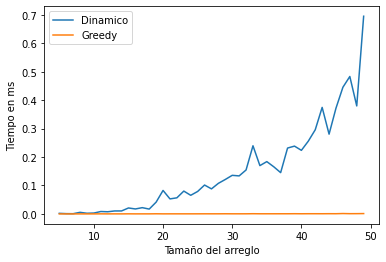

In [5]:
import math
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[];
y=[];
z=[];
for n in range(5,50):
  W, val, wt = knapsack_instance_generator(n)
  t = repeat(setup="from __main__ import mochila", stmt=f"mochila({W},{wt}, {val},{n})", repeat=1, number=10)
  k = repeat(setup="from __main__ import mochilaGreedy", stmt=f"mochilaGreedy({W},{wt}, {val},{n},{False})", repeat=1, number=10)
  x.append(n)
  y.append(t)
  z.append(k)
plt.plot(x,y)
plt.plot(x,z)

plt.legend(["Dinamico","Greedy"])
plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

**Análisis del experimento**

Se puede apreciar que el dinámico crece muchísimo más en comparación al greedy, esto ocurre debido a que la versión dinámica tiene que hacer una matriz que tiene complejidad **O(N*W)** mientras que la función más larga del greedy es el ordenamiento con el quicksort, este tiene complejidad **O(N*log(N))**

##5.2.Cantidad de iteraciones/subproblemas

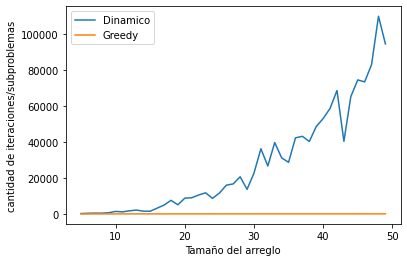

In [6]:
import math
import matplotlib.pyplot as plt

x=[n for n in range(5,50)]
y=[];
z=[];
for n in range(5,50):
  W, val, wt = knapsack_instance_generator(n)

  subproblemas=0
  mochila(W,wt,val,len(val))

  iteracion=0
  mochilaGreedy(W,wt,val,len(val))

  y.append(subproblemas)
  z.append(iteracion)
plt.plot(x,y)
plt.plot(x,z)

plt.legend(["Dinamico","Greedy"])
plt.xlabel('Tamaño del arreglo')
plt.ylabel('cantidad de iteraciones/subproblemas')
plt.show()

**Análisis de los resultados**

Al igual que el experimento anterior se puede notar que el dinámico está muy por arriba del greedy, esto ocurre ya que, para una capacidad enorme, se tiene que resolver una enorme cantidad de subproblemas, mientras que greedy hace una cantidad de iteraciones equivalente al tamaño de los arreglos

##5.3.Valores de los items alcanzados

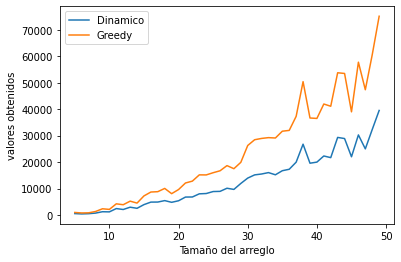

In [7]:
import math
import matplotlib.pyplot as plt

x=[n for n in range(5,50)]
y=[];
z=[];
for n in range(5,50):
  W, val, wt = knapsack_instance_generator(n)

  a=mochila(W,wt,val,len(val))


  b=mochilaGreedy(W,wt,val,len(val))

  y.append(a)
  z.append(b)
plt.plot(x,y)
plt.plot(x,z)

plt.legend(["Dinamico","Greedy"])
plt.xlabel('Tamaño del arreglo')
plt.ylabel('valores obtenidos')
plt.show()

**Análisis de los resultados**

Para poder analizar estos resultados debemos saber que el algoritmo greedy no es correcto, por lo tanto, esto nos puede inducir a errores en los resultados. Si apreciamos los gráficos, podemos notar que el algoritmo greedy se mantiene por arriba de los del dinámico la mayor parte, esto prueba que no es correcto ya que el dinámico no falla nunca